In [1]:
import pandas as pd
import os
import glob
import io 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from brainspace.gradient import GradientMaps
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
def get_gradients(matrix,region):

    #if region!='ctx':
    matrix= cosine_similarity(matrix.T, matrix.T)

    gm = GradientMaps(n_components=4, random_state=0)
    gm.fit(matrix)

    grad_1 = gm.gradients_.T[0]
    grad_2 = gm.gradients_.T[1]
    grad_3 = gm.gradients_.T[2]
    #grad_4 = gm.gradients_.T[3]

    gradient_df = pd.DataFrame({region+'_grad_1': grad_1, region+'_grad_2': grad_2, region+'_grad_3': grad_3})

    return gradient_df

In [3]:

import itertools
def reject_outliers_2(matrix, m=2.):

    mean_matrix = np.zeros((np.shape(matrix)[0],np.shape(matrix)[1]))
    for i, j in itertools.product(range(np.shape(matrix)[0]),range(np.shape(matrix)[1])):

        data = matrix[i,j,:]
        d = np.abs(data - np.median(data))
        mdev = np.median(d)
        s = d / (mdev if mdev else 1.)
        mean_matrix[i,j] = np.mean(data[s < m])
    return mean_matrix






In [8]:
df = pd.read_table('../participants.tsv')
subjects = df.participant_id.to_list() 
subj = [ s.strip('sub-') for s in subjects ]


def get_mean_matrix(session):
    #subj = ['3119','3120']
    matrix_dir = '/home/dimuthu1/scratch/PPMI_project2/derivatives/analysis/corr_matrix/'+session

    matrix = np.load(matrix_dir+"/sub-"+subj[0]+"_"+session+"_corr-matrix.npy")

    cube_matrix = np.zeros((np.shape(matrix)[0],np.shape(matrix)[1],len(subj)))

    


    for i,subjects in enumerate(subj):
        
        matrix = np.load(matrix_dir+"/sub-"+subj[0]+"_"+session+"_corr-matrix.npy")
        cube_matrix[:,:,i]=matrix

    mean_data = np.mean(cube_matrix, axis=2)
    #mean_data = reject_outliers_2(cube_matrix, m=2.)

    return mean_data,cube_matrix






In [9]:
mean_sbctx_12,cube_matrix = get_mean_matrix('month12')
mean_sbctx_24,cube_matrix = get_mean_matrix('month24')

#df_sbctx_12 = get_gradients(mean_sbctx_12,'sbctx')
#df_sbctx_24 = get_gradients(mean_sbctx_24,'sbctx')

#df_sbctx_12['month'] = 'm12'
#df_sbctx_24['month'] = 'm24'


#df_sbctx_all = df_sbctx_24.append(df_sbctx_12)
#out_path='/home/dimuthu1/scratch/PPMI_project2/derivatives/analysis/plots/group'
#sns_plot = sns.pairplot(df_sbctx_all,plot_kws={"s": 5}, hue="month")
#sns_plot.savefig(out_path+"/group_stat_sbctx.png")

#df_sbctx_all.to_csv(out_path+"/sbctx_gradients.csv", index=False)

MemoryError: Unable to allocate 6.43 GiB for an array with shape (4828, 4828, 37) and data type float64

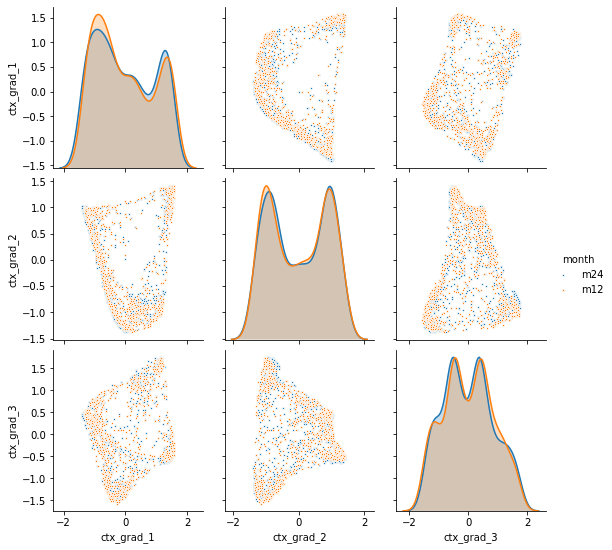

In [47]:
mean_ctx_12 = get_mean_matrix('month12','ctx')
mean_ctx_24 = get_mean_matrix('month24','ctx')

df_ctx_12 = get_gradients(mean_ctx_12,'ctx')
df_ctx_24 = get_gradients(mean_ctx_24,'ctx')


df_ctx_12['month'] = 'm12'
df_ctx_24['month'] = 'm24'


df_ctx_all = df_ctx_24.append(df_ctx_12)

out_path='/home/dimuthu1/scratch/PPMI_project2/derivatives/analysis/plots/group'
sns_plot = sns.pairplot(df_ctx_all,plot_kws={"s": 5}, hue="month")
sns_plot.savefig(out_path+"/group_stat_ctx.png")

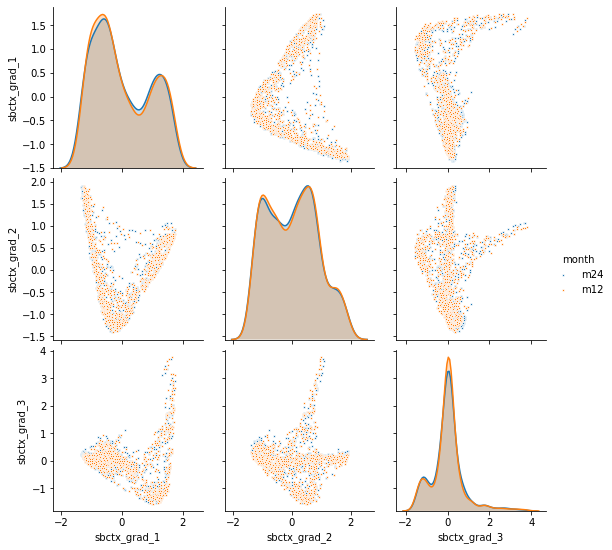

In [49]:
mean_sbctx_12 = get_mean_matrix('month12','sbctx')
mean_sbctx_24 = get_mean_matrix('month24','sbctx')

df_sbctx_12 = get_gradients(mean_sbctx_12.T,'sbctx')
df_sbctx_24 = get_gradients(mean_sbctx_24.T,'sbctx')

df_sbctx_12['month'] = 'm12'
df_sbctx_24['month'] = 'm24'


df_sbctx_all = df_sbctx_24.append(df_sbctx_12)
out_path='/home/dimuthu1/scratch/PPMI_project2/derivatives/analysis/plots/group'
sns_plot = sns.pairplot(df_sbctx_all,plot_kws={"s": 5}, hue="month")
sns_plot.savefig(out_path+"/group_stat_sbctx.png")

#df_sbctx_all.to_csv(out_path+"/sbctx_gradients.csv", index=False)